In [5]:
import scipy.io as sio
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from torch.autograd import Variable
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from torch.optim import SGD,Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import hiddenlayer as hl

In [21]:
data_x = np.load("./Doc2VecArray.npy")
data_x_pos = data_x[:10000]
data_x_neg = data_x[100000:110000]
data = np.append(data_x_pos,data_x_neg,axis=0)

print("data shape： ", data.shape)

label_list = ([1] * len(data_x_pos) + [0] * len(data_x_neg))
labels = np.array(label_list)
print("label shape： ", labels.shape)

train_x,val_x,train_y,val_y = train_test_split(data, labels, test_size=0.2)

print("training set shape： ", train_x.shape)
print("validation set shape： ", val_x.shape)

data shape：  (20000, 300)
label shape：  (20000,)
training set shape：  (16000, 300)
validation set shape：  (4000, 300)


In [13]:
class FullyConnectedNuralNetwork(nn.Module):
    def __init__(self):
        super(FullyConnectedNuralNetwork,self).__init__() 
        self.hidden1=nn.Sequential(
                nn.Linear(in_features=300,out_features=64,bias=True),
                nn.ReLU())
        self.hidden2=nn.Sequential(
                nn.Linear(in_features=64,out_features=10,bias=True),
                nn.ReLU())
        self.hidden3=nn.Sequential(
                nn.Linear(in_features=10,out_features=2,bias=True),
                nn.Sigmoid())
    def forward(self,x):
        fc1 = self.hidden1(x)
        fc2 = self.hidden2(fc1)
        output = self.hidden3(fc2)
        return fc1,fc2,output

In [22]:
train_x=torch.from_numpy(train_x.astype(np.float32))
train_y=torch.from_numpy(train_y.astype(np.float32))
val_x=torch.from_numpy(val_x.astype(np.float32))
val_y=torch.from_numpy(val_y.astype(np.float32))
train_y = train_y.type(torch.LongTensor)
val_y = val_y.type(torch.LongTensor)

train_data = Data.TensorDataset(train_x,train_y)
train_loader = Data.DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=1)


In [15]:
FCNN=FullyConnectedNuralNetwork()
optomizerAdam=torch.optim.Adam(FCNN.parameters(),lr=0.01)
lossFunc=nn.CrossEntropyLoss()

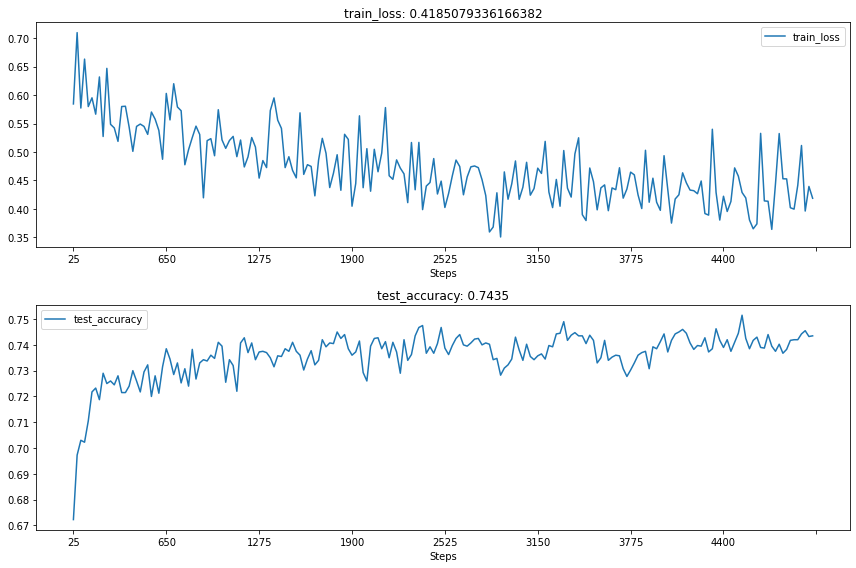

In [23]:
history1=hl.History()
canvas1=hl.Canvas()
logStep=25
for epoch in range(20):
    for step,(batch_x,batch_y) in enumerate(train_loader):
        _,_,output=FCNN(batch_x)
        train_loss=lossFunc(output,batch_y)
        optomizerAdam.zero_grad()
        train_loss.backward()
        optomizerAdam.step()
        
        niter=epoch*len(train_loader)+step+1
        if niter % logStep ==0:
            _,_,output=FCNN(val_x)
            _,pre_lab=torch.max(output,1)
            test_accuracy=accuracy_score(val_y,pre_lab)
            history1.log(niter,train_loss=train_loss,test_accuracy=test_accuracy)
            with canvas1:
                canvas1.draw_plot(history1['train_loss'])
                canvas1.draw_plot(history1['test_accuracy'])


In [ ]:
torch.save(FCNN, './D2V_FCNN.pt')